# ALMA-IMF/SPICY Comparison

In [1]:
import imp, table_loading
imp.reload(table_loading)

<module 'table_loading' from '/home/btingle/table_loading.py'>

In [2]:
from table_loading import *

In [3]:
import os

In [4]:
from astropy.stats import mad_std

In [5]:
from astropy.visualization import simple_norm

In [6]:
pl.style.use('dark_background')
pl.rcParams['font.size'] = 16

In [7]:
# filepath = f'/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/{hide2}'
filepath = f'/blue/adamginsburg/btingle'
mipsview = False

In [8]:
apertures_both = {
    "north": [2, 2, 2, 2.4, 2.4, 2.4, 2.4, 6, 10, 13.5, 23, 30, 41, 3, 3]*u.arcsec,
    "south": [1.415, 1.415, 1.415, 1.415, 1.415, 2.4, 2.4, 2.4, 2.4, 6, 10, 13.5, 23, 30, 41, 3, 3]*u.arcsec,
    }

In [9]:
distances = {
    "W51-E": 5.4,
    "W43MM1": 5.5,
    "G333": 4.2,
    "W51IRS2": 5.4,
    "G338": 3.9,
    "G10": 4.95,
    "W43MM2": 5.5,
    "G008": 3.4,
    "G12": 2.4,
    "G327": 2.5,
    "W43MM3": 5.5,
    "G351": 2.0,
    "G353": 2.0,
    "G337": 2.7,
    "G328": 2.5,
}

In [10]:
ls /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/

2MASS/  Herschel/  JWST/  Paranal/  Spitzer/  user_filters/  WISE/


# Region Prep

## Location Figures

In [135]:
fieldid = 'W51-E'

In [136]:
def locfig_function(fieldid):
    
    fulltbl, fullcoords = get_spicy_tbl()
    tbl = find_ALMAIMF_matches(fulltbl, fullcoords)
    #fulltbl = Table.read('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits')
    #fullcoords = SkyCoord(fulltbl['l'], fulltbl['b'], frame='galactic', unit=(u.deg, u.deg))

    tbl = fulltbl[fulltbl['ALMAIMF_FIELDID'] == fieldid]
    tbl.add_index('SPICY')
    tbl.sort('SPICY')
    
    sourceids = []
    for spicyid in tbl['SPICY']:
        sourceids.append(spicyid)
        
    print(sourceids)
        
    for source in sourceids:
        fig = show_source_on_spitzer(fieldid,fullcoords,source,mips=mipsview)
        fig.savefig(f'{filepath}/Location_figures/{fieldid}/{source}.pdf', format="pdf", overwrite=True)
        fig.savefig(f'{filepath}/Location_figures/{fieldid}/{source}.jpg', format="jpg", overwrite=True)
        
#    try:
#        sourceids = []
#        
#        for spicyid in tbl['SPICY']:
#            sourceids.append(spicyid)
#        
#        for source in sourceids:
#            fig = show_source_on_spitzer(fieldid,fullcoords,source,mips=mipsview)
#            fig.savefig(f'{filepath}/Location_figures/{fieldid}/{source}.pdf', format="pdf",overwrite=True)
        
#    except AttributeError:
#        print(f"Error encountered which indicates that {fieldid} only has one source match! If this is true, ignore.")
#        source, sourceids = [tbl['SPICY']], [tbl['SPICY']]
#        fig = show_source_on_spitzer(fieldid,fullcoords,source,mips=mipsview)
#        fig.savefig(f'{filepath}/Location_figures/{fieldid}/{source}.pdf', format="pdf", overwrite=True)
        
    return fig, sourceids

  0%|          | 0/15 [00:00<?, ?it/s]

[31362, 31366, 31367, 31389, 31390, 31395, 31405, 31415, 31420, 31423, 31431, 31432, 31438, 31441, 31444, 31453, 31463]


  7%|▋         | 1/15 [02:04<28:56, 124.03s/it]

[36252, 36263]


 13%|█▎        | 2/15 [02:22<13:25, 61.94s/it] 

[77416, 77428, 77443, 77447, 77452, 77454, 77462, 77465, 77498, 77504, 77507]


 20%|██        | 3/15 [03:28<12:48, 64.00s/it]

[102000, 102002, 102007]


 27%|██▋       | 4/15 [03:54<08:55, 48.71s/it]

[73642, 73650, 73653, 73659, 73662, 73668, 73673, 73675, 73676, 73678, 73683, 73695, 73698]


 33%|███▎      | 5/15 [05:17<10:11, 61.16s/it]

[30375, 30411, 30414, 30416, 30423, 30425]


 40%|████      | 6/15 [06:01<08:16, 55.20s/it]

[75717, 75725, 75735, 75743, 75752, 75756, 75767, 75788]


 47%|████▋     | 7/15 [06:56<07:22, 55.31s/it]

[40311, 40312, 40328, 40343, 40344, 40362, 40365, 40367, 40380, 40382]


 53%|█████▎    | 8/15 [08:05<06:58, 59.72s/it]

[40114, 40135, 40136, 40141, 40158]


 60%|██████    | 9/15 [08:43<05:17, 52.88s/it]

[54167, 54182, 54188, 54189, 54192, 54197, 54200, 54207, 54212, 54213, 54221, 54222, 54224, 54228, 54233, 54235, 54251, 54254, 54255, 54265, 54268]


 67%|██████▋   | 10/15 [10:43<06:07, 73.60s/it]

[55853, 55858, 55859, 55862, 55873, 55876, 55881, 55896, 55901, 55924, 55932]


 73%|███████▎  | 11/15 [11:50<04:46, 71.55s/it]

[92076]


 80%|████████  | 12/15 [12:02<02:39, 53.32s/it]

[91989, 92015, 92039, 92043, 92055, 92056]


 87%|████████▋ | 13/15 [12:57<01:47, 53.97s/it]

[92074, 92122]


 93%|█████████▎| 14/15 [13:16<00:43, 43.30s/it]

[102038, 102062]


100%|██████████| 15/15 [13:40<00:00, 54.71s/it]


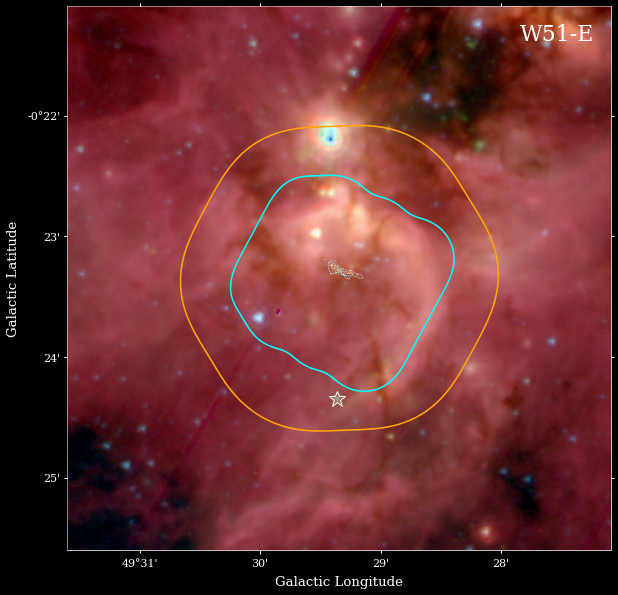

In [137]:
for fieldid in tqdm(prefixes.keys()):
    locfig_function(fieldid)

## ALMA Imaging

In [9]:
fieldid = 'W43MM3'

In [10]:
def alma_imaging(tbl, fieldid, aperture_radius=3*u.arcsec,
                        annulus_inner=3*u.arcsec, annulus_outer=5*u.arcsec,
                        basepath='/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults',
                        band='b3', wlname='3mm'):

    pfxs = prefixes[fieldid]
    cube = SpectralCube.read(basepath + '/' + pfxs[f'finaliter_prefix_{band}']+".image.tt0.fits",
                             format='fits', use_dask=False).minimal_subcube()
    alma_rms = cube.mad_std()

    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]

    fig = pl.figure(figsize=(10,10))
    ax = fig.add_subplot(projection=ww)
    ax.imshow(cube[0].value, norm=simple_norm(cube[0].value, max_percent=99., min_percent=1, stretch='asinh'))
        
    match = tbl['ALMAIMF_FIELDID'] == fieldid

    crds = SkyCoord(tbl['ra'], tbl['dec'])[match]
        
    ax.plot(crds.fk5.ra.deg, crds.fk5.dec.deg, 'wo', mfc='none', mec='r', markersize=10, transform=ax.get_transform('fk5'), )
        
    alma_rms = cube.mad_std()
        
    return alma_rms

In [94]:
alma_imaging(tbl, fieldid, band='b3', wlname='3mm'), alma_imaging(tbl, fieldid, band='b6', wlname='1mm')

(<Quantity 7.48301919e-05 Jy / beam>, <Quantity 0.0002602 Jy / beam>)

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 0).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 0).

<Figure size 720x720 with 1 Axes>

## Table

### From-scratch Assembly

In [919]:
fieldid = 'W51IRS2'

#### Assembly

In [920]:
tbl, coords = get_spicy_tbl()
tbl = find_ALMAIMF_matches(tbl, coords)
# CROP BASED ON IF IN ALMA-IMF
tblmsk = tbl['in_ALMAIMF']
tbl = tbl[tblmsk]
coords = coords[tblmsk]
# CROP BASED ON IF IN GIVEN FIELD
tblmask = Table([tbl['ALMAIMF_FIELDID'] == fieldid])['col0']
tbl = tbl[tblmask]
coords = coords[tblmask]

In [921]:
is_ukidss = np.any([x != '                   ' for x in [tbl['UKIDSS']]])
is_virac = np.any([x != np.ma.masked for x in [tbl['VIRAC']]])

print(is_ukidss, is_virac)
if is_ukidss and not is_virac:
    sed_filters, wavelength_dict, filternames, zpts = get_filters("north")
    apertures = apertures_both["north"]
elif is_virac and not is_ukidss:
    sed_filters, wavelength_dict, filternames, zpts = get_filters("south")
    apertures = apertures_both["south"]
else:
    print("ERROR: SOMETHING WENT WRONG, CHECK TABLE")

True False


#### Adding Data

In [922]:
print("Adding Herschel data")
tbl = add_herschel_limits(tbl, coords)

Adding Herschel data


100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


In [923]:
print("Adding MIPS match data")
tbl = add_MIPS_matches(tbl)

Adding MIPS match data


In [924]:
tbl.sort('SPICY')

In [925]:
print("Adding MIPS limit data")
tbl = add_mips_limits(tbl, coords)

Adding MIPS limit data


100%|██████████| 3/3 [00:01<00:00,  2.75it/s]


In [926]:
print("Adding VVV data")
try:
    tbl = add_VVV_matches(tbl)
    has_VVV = True
except IndexError:
    print("No VIRAC matches found.")
    has_VVV = False

Adding VVV data
No VIRAC matches found.


In [927]:
print("Adding UKIDSS data")
try:
    tbl = add_UKIDSS_matches(tbl)
    has_UKIDSS = True
except IndexError:
    print("No UKIDSS matches found.")
    has_UKIDSS = False

Adding UKIDSS data


/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:3381: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  _data[indx] = dval
/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:3382: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  _mask[indx] = mval
/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:3220: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

In [928]:
tbl.sort('SPICY')
tbl['UKIDSS'][tbl['UKIDSS'] == '0.0'] = -99999
tbl['UKIDSS'].mask = [tbl['UKIDSS'] == '-99999']

In [929]:
print("Adding ALMA-IMF photometry")
tbl = add_alma_photometry(tbl, band='b3', wlname='3mm')
tbl = add_alma_photometry(tbl, band='b6', wlname='1mm')

Adding ALMA-IMF photometry


#### Tweaking Table

In [930]:
if is_ukidss:
    magcols = ['Jmag', 'Hmag', 'Kmag1','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0']
    emagcols = ['e_Jmag', 'e_Hmag', 'e_Kmag1','e_mag3_6', 'e_mag4_5', 'e_mag5_8', 'e_mag8_0']
elif is_virac:
    magcols = ['Ymag', 'Zmag', 'Jmag', 'Hmag', 'Ksmag','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0']
    emagcols = ['Yell', 'Zell', 'Jell', 'Hell', 'KsEll','e_mag3_6', 'e_mag4_5', 'e_mag5_8', 'e_mag8_0']
else:
    print("ERROR!")

In [931]:
print("Converting magnitudes to fluxes")
tbl = mag_to_flux(tbl, magcols, emagcols, zpts, filternames)

Converting magnitudes to fluxes
Jmag UKIRT/UKIDSS.J
Hmag UKIRT/UKIDSS.H
Kmag1 UKIRT/UKIDSS.K
mag3_6 Spitzer/IRAC.I1
mag4_5 Spitzer/IRAC.I2
mag5_8 Spitzer/IRAC.I3
mag8_0 Spitzer/IRAC.I4


In [932]:
print("Fixing MIPS upper limits")
tbl.rename_column('S24', 'Spitzer/MIPS.24mu_flux')
tbl.rename_column('e_S24', 'Spitzer/MIPS.24mu_eflux')

Fixing MIPS upper limits


In [933]:
print("Converting ALMA fluxes to mJy/beam")
for colname in ['ALMA-IMF_3mm_flux', 'ALMA-IMF_3mm_eflux', 'ALMA-IMF_1mm_flux', 'ALMA-IMF_1mm_eflux']:
    tbl[colname] = tbl[colname] * u.Jy / u.beam
    tbl[colname] = tbl[colname].to(u.mJy / u.beam)

Converting ALMA fluxes to mJy/beam


In [934]:
print("Adding VIRAC upper limits")

vistaupperlims = {"Y": 0.02084540283203125,
                  "Z": 0.014287492998478904,
                  "J": 0.0245767,
                  "H": 0.025805469092337628,
                  "Ks": 0.042246558,}

for key in vistaupperlims.keys():
    if f'Paranal/VISTA.{key}_flux' and f'Paranal/VISTA.{key}_eflux' in tbl.keys():
        tbl[f'Paranal/VISTA.{key}_flux'].unit = u.mJy
        tbl[f'Paranal/VISTA.{key}_eflux'].unit = u.mJy
        tbl[f'Paranal/VISTA.{key}_eflux'].fill_value = vistaupperlims[key]
        tbl[f'Paranal/VISTA.{key}_eflux'] = tbl[f'Paranal/VISTA.{key}_eflux'].filled()
    else: print(f'{key} band not found.')

Adding VIRAC upper limits
Y band not found.
Z band not found.
J band not found.
H band not found.
Ks band not found.


In [935]:
print("Adding UKIDSS upper limits")

ukidssupperlims = {"J": 0.0278,
                  "H": 0.0406,
                  "K": 0.0522,}

for key in ukidssupperlims.keys():
    if f'UKIRT/UKIDSS.{key}_flux' and f'UKIRT/UKIDSS.{key}_eflux' in tbl.keys():
        tbl[f'UKIRT/UKIDSS.{key}_flux'].unit = u.mJy
        tbl[f'UKIRT/UKIDSS.{key}_eflux'].unit = u.mJy
        tbl[f'UKIRT/UKIDSS.{key}_eflux'].fill_value = ukidssupperlims[key]
        tbl[f'UKIRT/UKIDSS.{key}_eflux'] = tbl[f'UKIRT/UKIDSS.{key}_eflux'].filled()
    else: print(f'{key} band not found.')

Adding UKIDSS upper limits


In [936]:
print("Converting Herschel fluxes to upper limits")
tbl["Herschel/Pacs.blue_eflux"] = (tbl['70' ].quantity * u.pixel).to(u.mJy)
tbl["Herschel/Pacs.red_eflux"]  = (tbl['160'].quantity * u.pixel).to(u.mJy)
tbl["Herschel/SPIRE.PSW_eflux"] = (tbl['250'].quantity * Herschel_Beams['250']).to(u.mJy)
tbl["Herschel/SPIRE.PMW_eflux"] = (tbl['350'].quantity * Herschel_Beams['350']).to(u.mJy)
tbl["Herschel/SPIRE.PLW_eflux"] = (tbl['500'].quantity * Herschel_Beams['500']).to(u.mJy)

tbl["Herschel/Pacs.blue_flux"] = np.nan 
tbl["Herschel/Pacs.red_flux"]  = np.nan
tbl["Herschel/SPIRE.PSW_flux"] = np.nan 
tbl["Herschel/SPIRE.PMW_flux"] = np.nan 
tbl["Herschel/SPIRE.PLW_flux"] = np.nan

Converting Herschel fluxes to upper limits


#### Save Table

In [937]:
if is_ukidss:
    tbl.meta['description'] = 'UKIDSS catalog'

In [938]:
tbl.write(f'{filepath}/Region_tables/Unfitted/{fieldid}', format='fits', overwrite=True)

# Fitting

In [28]:
fieldid = 'G10'

In [29]:
tbl = Table.read(f'{filepath}/Region_tables/Unfitted/{fieldid}', format='fits')
tbl.add_index('SPICY')
tbl.sort('SPICY')

In [30]:
tbl

<Table length=8>
SPICY     ra        dec     ... Herschel/SPIRE.PMW_flux Herschel/SPIRE.PLW_flux
         deg        deg     ...                                                
int64  float64    float64   ...         float64                 float64        
----- ---------- ---------- ... ----------------------- -----------------------
75717 272.598455 -19.936166 ...                      --                      --
75725 272.606971 -19.922476 ...                      --                      --
75735 272.611658 -19.939274 ...                      --                      --
75743 272.614573 -19.932154 ...                      --                      --
75752  272.62026 -19.930292 ...                      --                      --
75756 272.621556 -19.928068 ...                      --                      --
75767 272.630948 -19.945787 ...                      --                      --
75788 272.641466 -19.925479 ...                      --                      --

In [31]:
is_ukidss = np.any([x != ' ' for x in [tbl['UKIDSS']]])
is_virac = np.any([x != np.ma.masked for x in [tbl['VIRAC']]])

print(is_ukidss, is_virac)
if is_ukidss and not is_virac:
    sed_filters, wavelength_dict, filternames, zpts = get_filters("north")
    hemisphere = "north"
    apertures = apertures_both["north"]
elif is_virac and not is_ukidss:
    sed_filters, wavelength_dict, filternames, zpts = get_filters("south")
    hemisphere = "south"
    apertures = apertures_both["south"]
else:
    print("ERROR: SOMETHING WENT WRONG, CHECK TABLE")

True False


In [32]:
apertures

<Quantity [ 2. ,  2. ,  2. ,  2.4,  2.4,  2.4,  2.4,  6. , 10. , 13.5,
           23. , 30. , 41. ,  3. ,  3. ] arcsec>

In [33]:
if not os.path.exists(f'{filepath}/SED_plots/{fieldid}'):
    os.makedirs(f'{filepath}/SED_plots/{fieldid}')

In [34]:
regiondistance = distances[fieldid]
print(regiondistance)
distance_range=[regiondistance-0.2, regiondistance+0.2]*u.kpc
av_range=[regiondistance*2,40]

4.95


## Functions

In [35]:
def get_chi2limit():
    chi2min = np.nanmin([np.nanmin(fits[geom].chi2) for geom in geometries])
    chi2limit = chi2min*3
    if chi2limit < 3:
        chi2limit = 3
    return chi2limit, chi2min

def get_modelcount(chi2limit=3):
    modelcount = 0
    for geom in geometries:
        for x in fits[geom].chi2:
            if x < chi2limit:
                modelcount = modelcount+1
    return modelcount

def get_okgeo(show=True):
    okgeo = []

    for geom in geometries:
        # we impose an _absolute_ chi^2 limit (the fitter uses a _relative_, delta chi2 limit)
        if show:
            print(f"{geom}: {np.nanmin(fits[geom].chi2):12.1f}")
        if np.nanmin(fits[geom].chi2) < chi2limit:
            okgeo.append(geom)
    if show:
        print(okgeo)
        
    return okgeo

def make_datatable(spicyid):
    rownum = tbl.loc_indices[spicyid]
    flx, error, valid = get_data_to_fit(rownum, tbl, filters=filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"])
    datatable = QTable([filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"], flx, error, valid], names=['band','flux','error','valid'])
    return datatable

In [36]:
filternames

['UKIRT/UKIDSS.J',
 'UKIRT/UKIDSS.H',
 'UKIRT/UKIDSS.K',
 'Spitzer/IRAC.I1',
 'Spitzer/IRAC.I2',
 'Spitzer/IRAC.I3',
 'Spitzer/IRAC.I4',
 'Spitzer/MIPS.24mu',
 'Herschel/Pacs.blue',
 'Herschel/Pacs.red',
 'Herschel/SPIRE.PSW',
 'Herschel/SPIRE.PMW',
 'Herschel/SPIRE.PLW']

In [53]:
def full_source_fit(spicyid, av_range, distance_range, hemisphere, filternames=filternames):
    rownum = tbl.loc_indices[spicyid]
    flx, error, valid = get_data_to_fit(rownum, tbl, filters=filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"])
    print(filternames)
    
    datatable = Table([flx, error, valid])
    print(datatable)
    
    print(filternames, hemisphere)
    if hemisphere == "north":
        filternames = ['Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
                   'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4', 'Spitzer/MIPS.24mu',
                   'Herschel/Pacs.blue', 'Herschel/Pacs.red', 'Herschel/SPIRE.PSW', 'Herschel/SPIRE.PMW', 'Herschel/SPIRE.PLW'
                  ]

    #start = time.time()
    fits = {geom:
            fit_a_source(data=flx,#.quantity,
                 error=error,#.quantity,
                 valid=valid, aperture_size=apertures,#.quantity,
                 filters=filternames+["user_filters/ALMA-IMF_1mm", "user_filters/ALMA-IMF_3mm"],#.quantity,
                       av_range=av_range,
                       distance_range=distance_range,
                         geometry=geom,
                      )
            for geom in tqdm_notebook(geometries, desc = f'Fitting SPICY {spicyid}')}
    #duration = time.time()-start
    #print(f"end at t={duration}")
    
    return fits

## Multi Plotting

In [38]:
sourceids = []
for spicyid in tbl['SPICY']:
    sourceids.append(spicyid)

In [39]:
sourceids

[75717, 75725, 75735, 75743, 75752, 75756, 75767, 75788]

In [40]:
%run /home/btingle/plot_fit.py

In [41]:
default_aperture = 3000*u.au
distance = (regiondistance * u.kpc).mean()
sedcube = SEDCube.read(f"/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s---s-i/flux.fits")
apnum = np.argmin(np.abs(default_aperture - sedcube.apertures))

In [42]:
hemisphere

'north'

  0%|          | 0/8 [00:00<?, ?it/s]

['UKIRT/UKIDSS.J', 'UKIRT/UKIDSS.H', 'UKIRT/UKIDSS.K', 'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4', 'Spitzer/MIPS.24mu', 'Herschel/Pacs.blue', 'Herschel/Pacs.red', 'Herschel/SPIRE.PSW', 'Herschel/SPIRE.PMW', 'Herschel/SPIRE.PLW']
        col0                col1        col2
------------------- ------------------- ----
             0.0834               0.997    3
0.12179999999999999               0.997    3
0.15660000000000002               0.997    3
 1.4956430268614485 0.19072878177158684    1
 1.8405261704094316 0.23302072835690296    1
                nan                 nan    0
  6.886101525339416  1.0297564956279677    1
                nan                 nan    0
   5478.59174643256               0.997    3
  8205.171756226593               0.997    3
 128507.87850422491               0.997    3
  94648.77082639778               0.997    3
  59809.01051996683               0.997    3
                nan                 nan    0
                nan

Fitting SPICY 75717:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading

Fitting SPICY 75725:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02


   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer

Fitting SPICY 75735:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02


   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer

Fitting SPICY 75743:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02


   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer

Fitting SPICY 75752:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02


   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer

Fitting SPICY 75756:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02


   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer

Fitting SPICY 75767:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02


   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer

Fitting SPICY 75788:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02


   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Spitzer

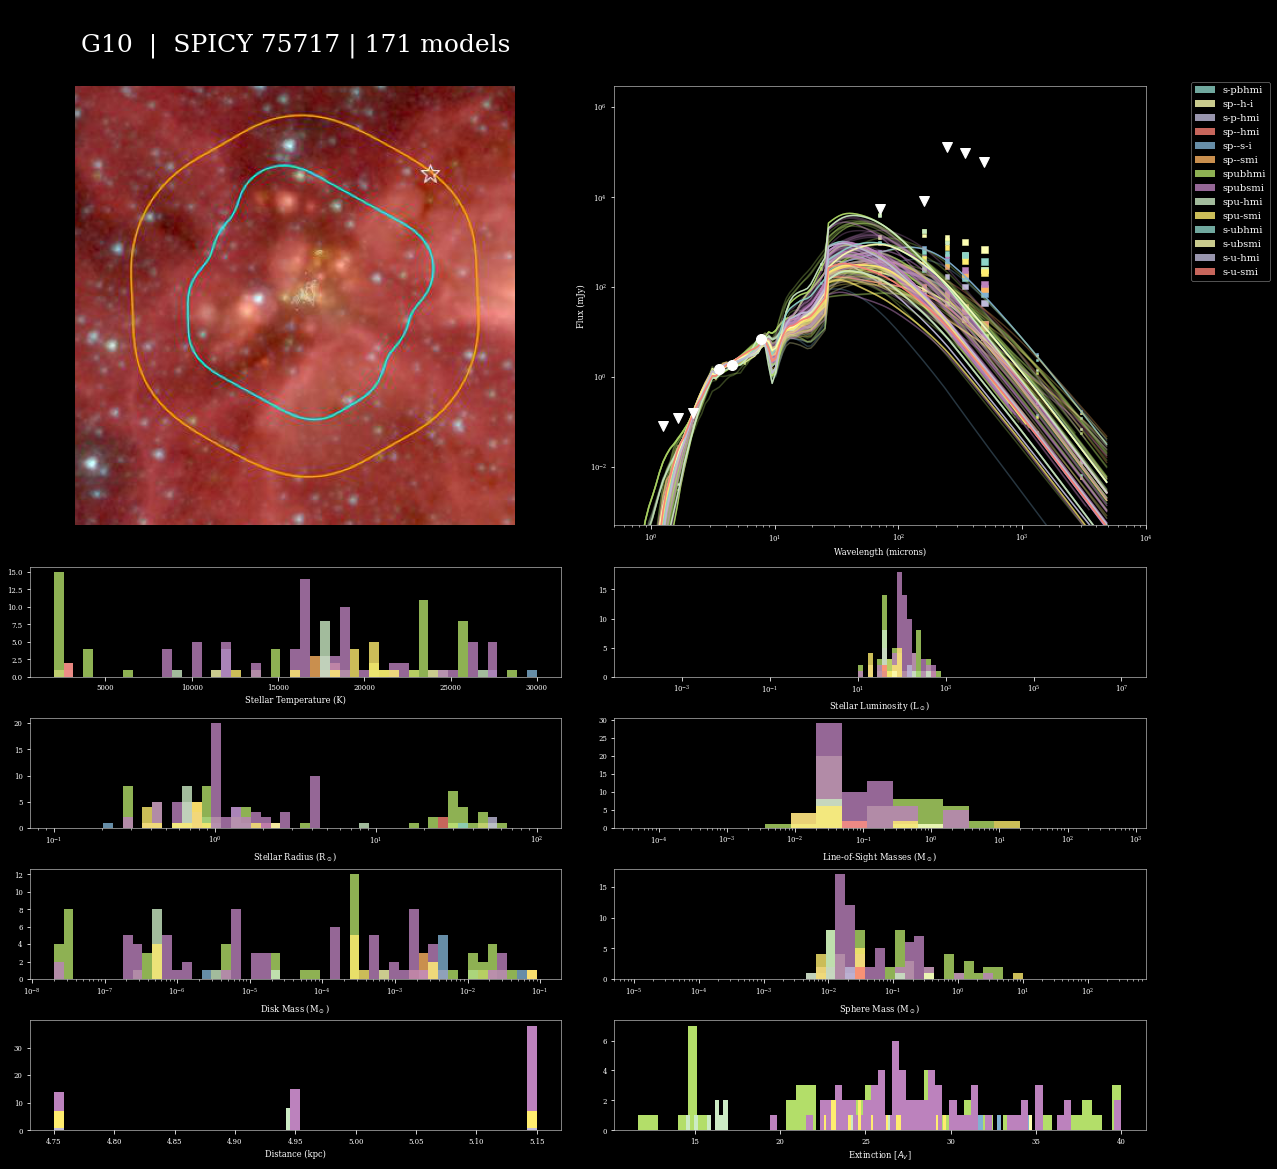

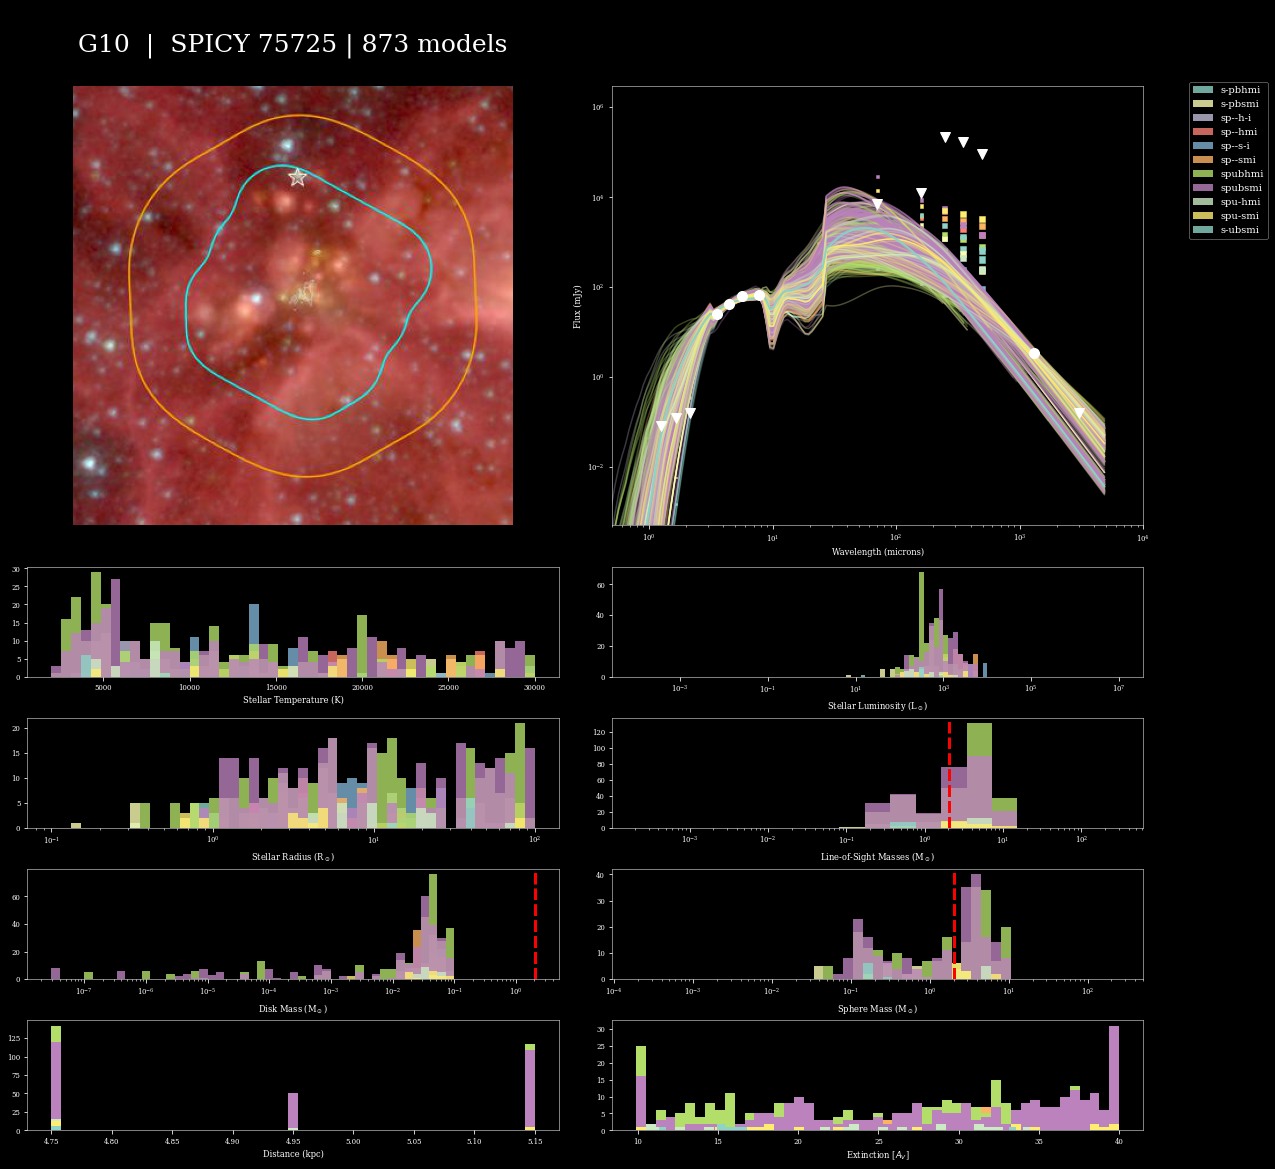

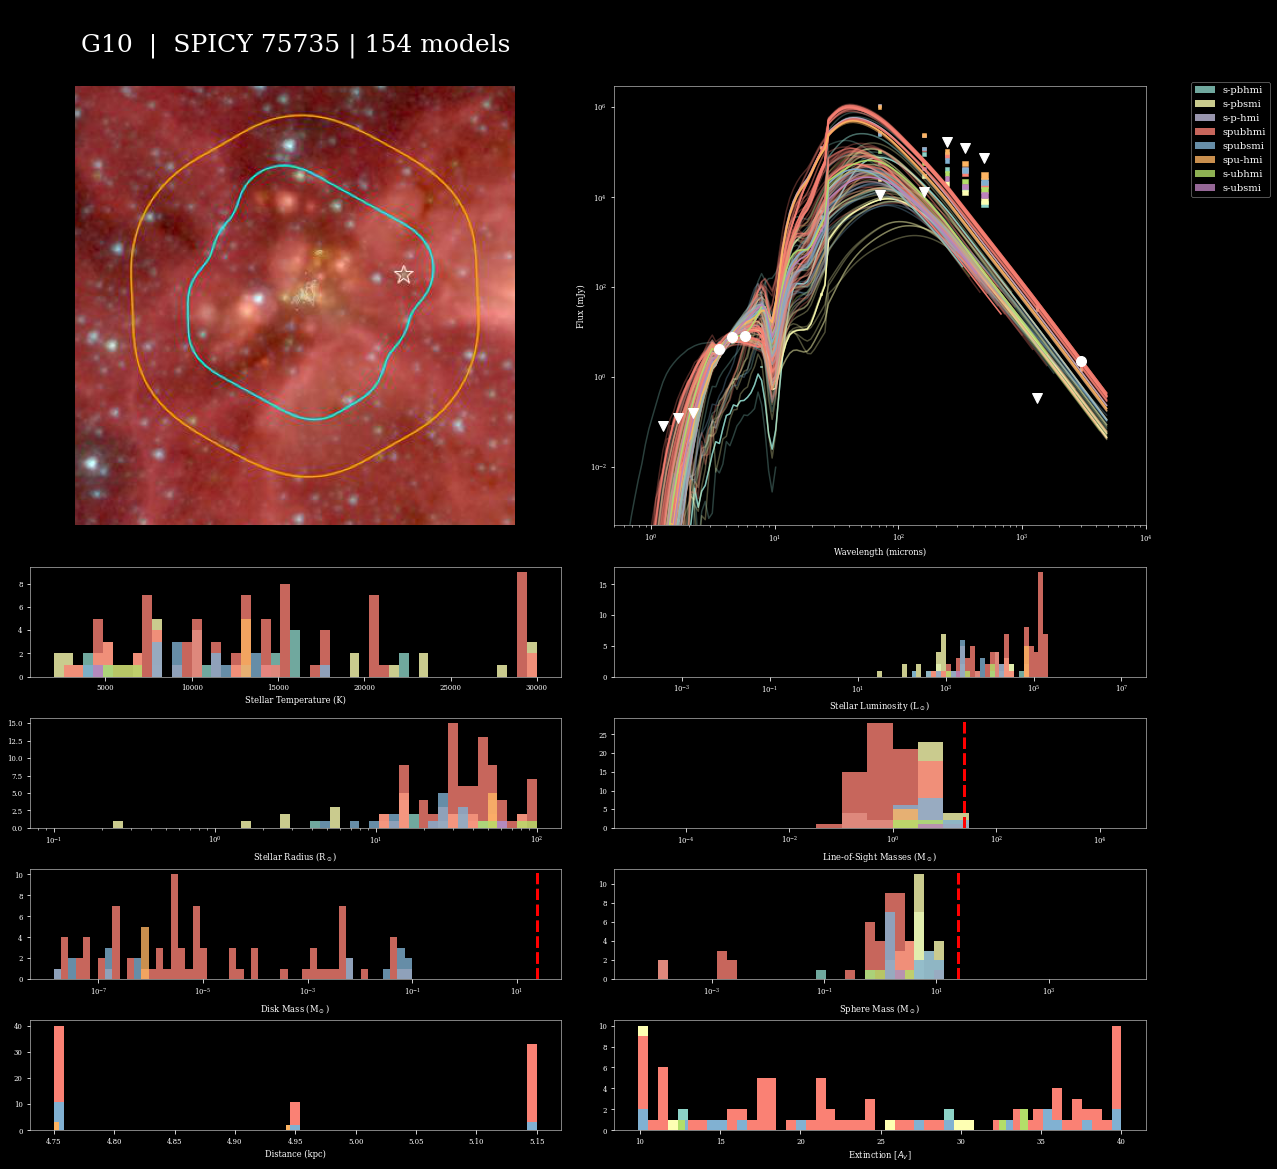

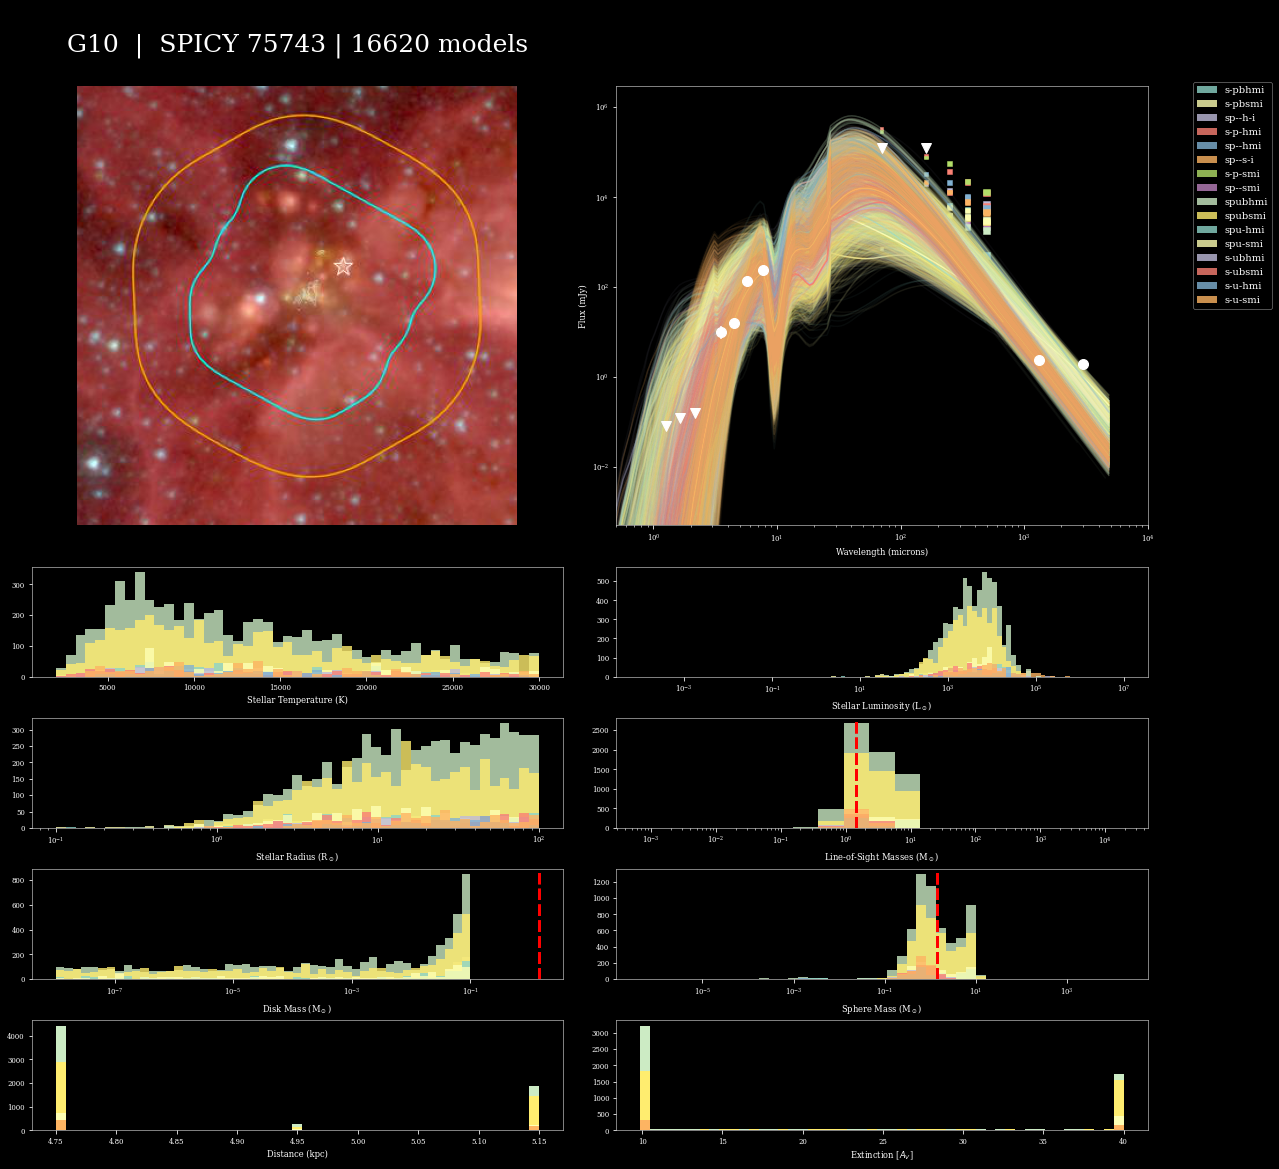

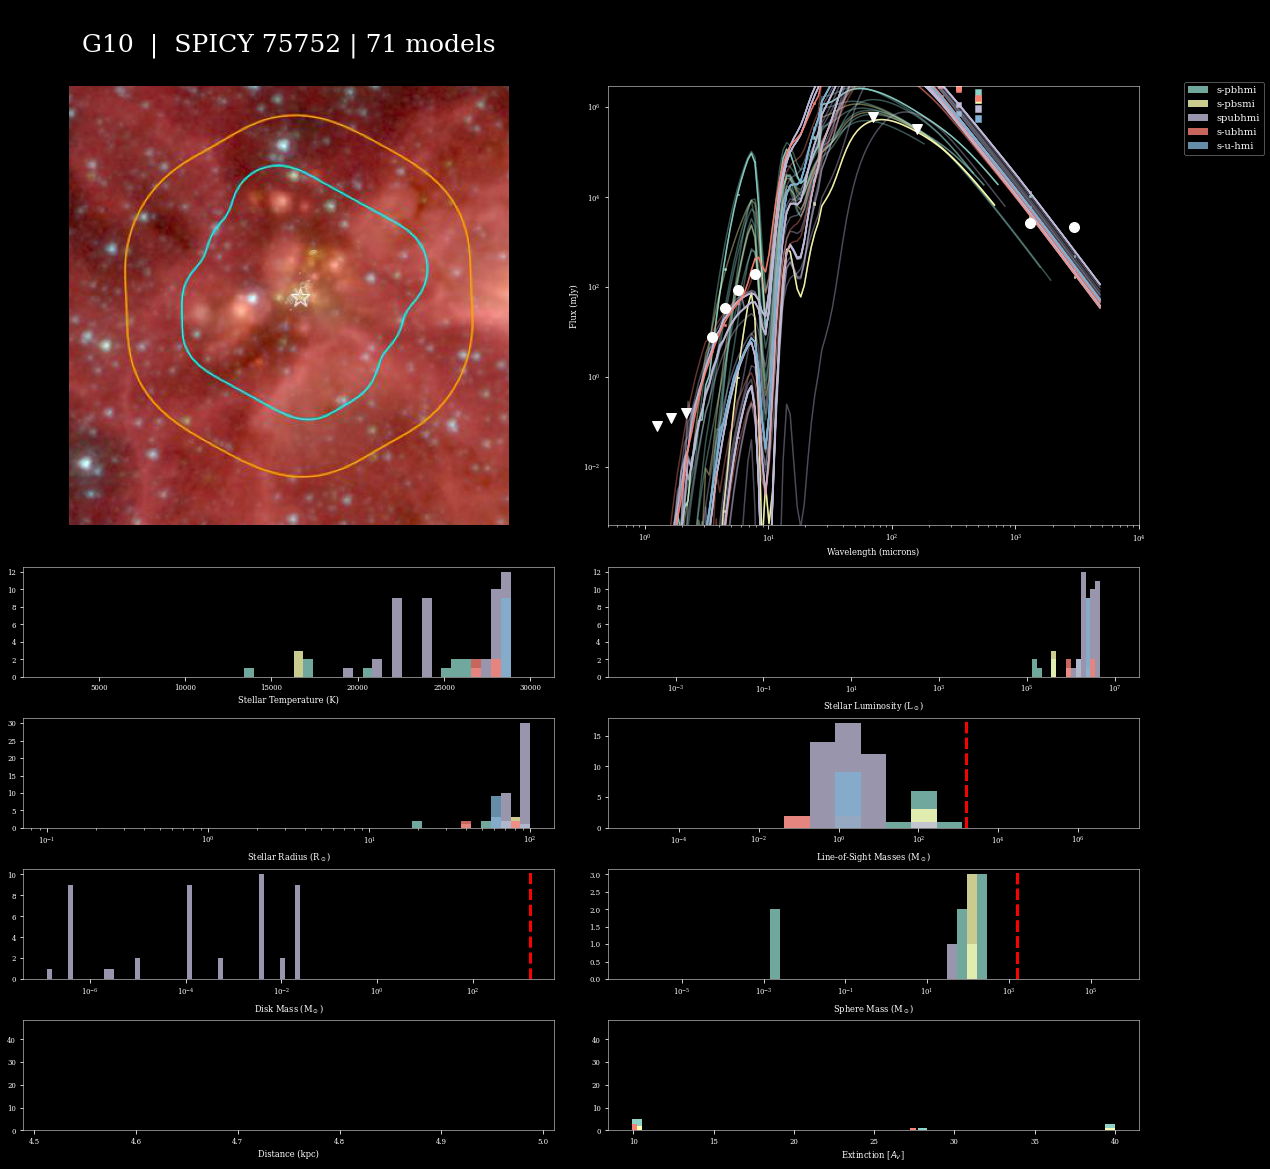

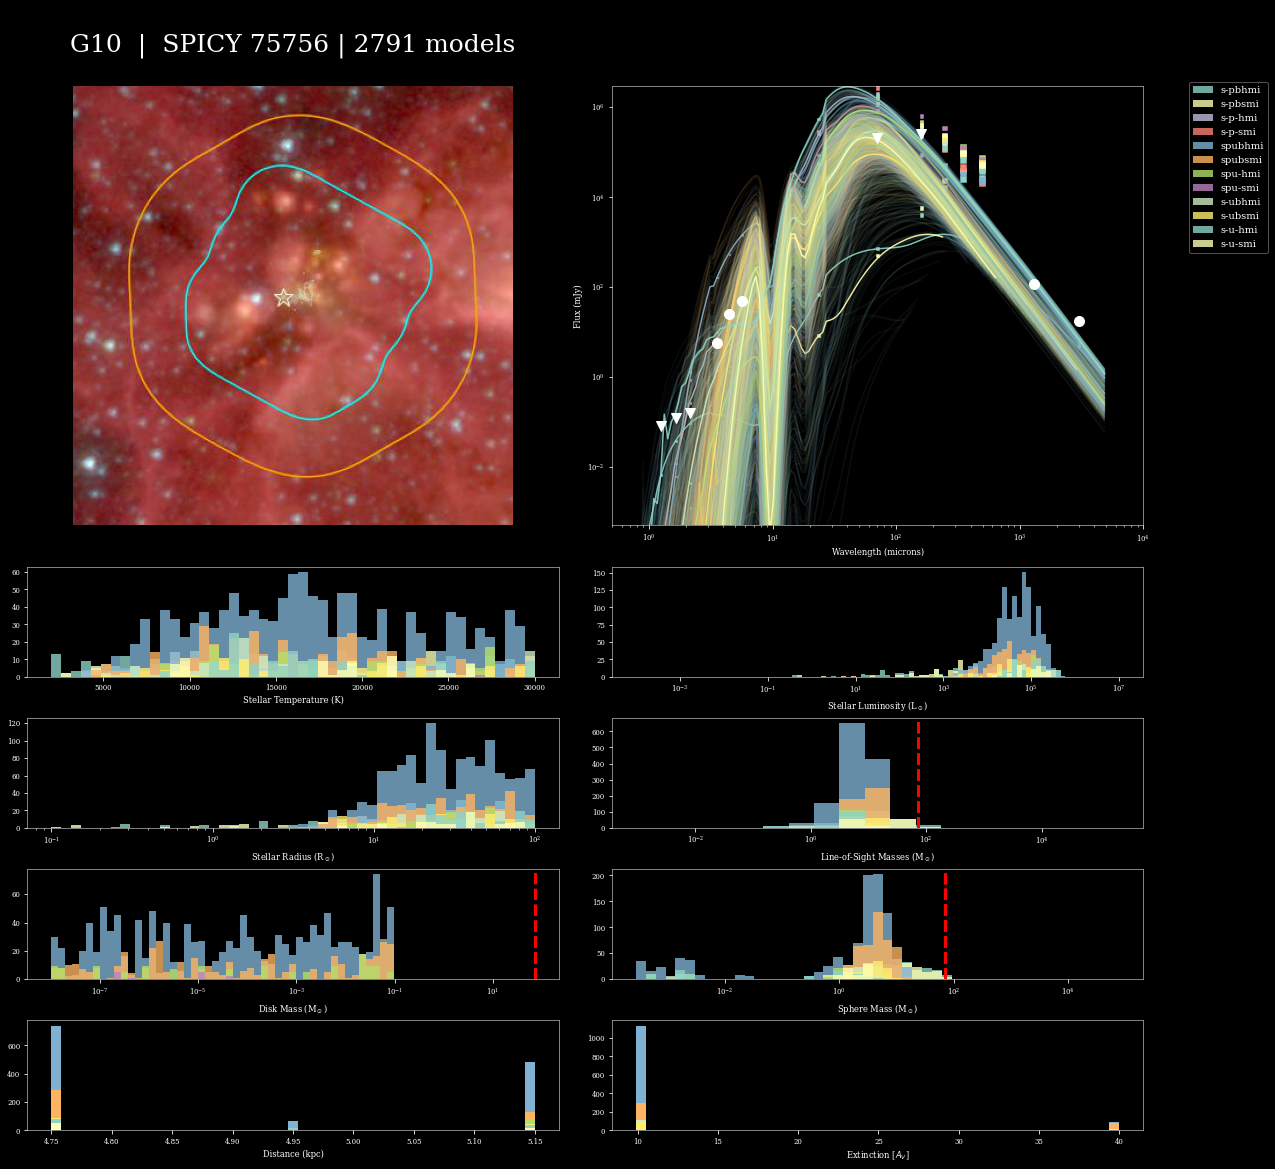

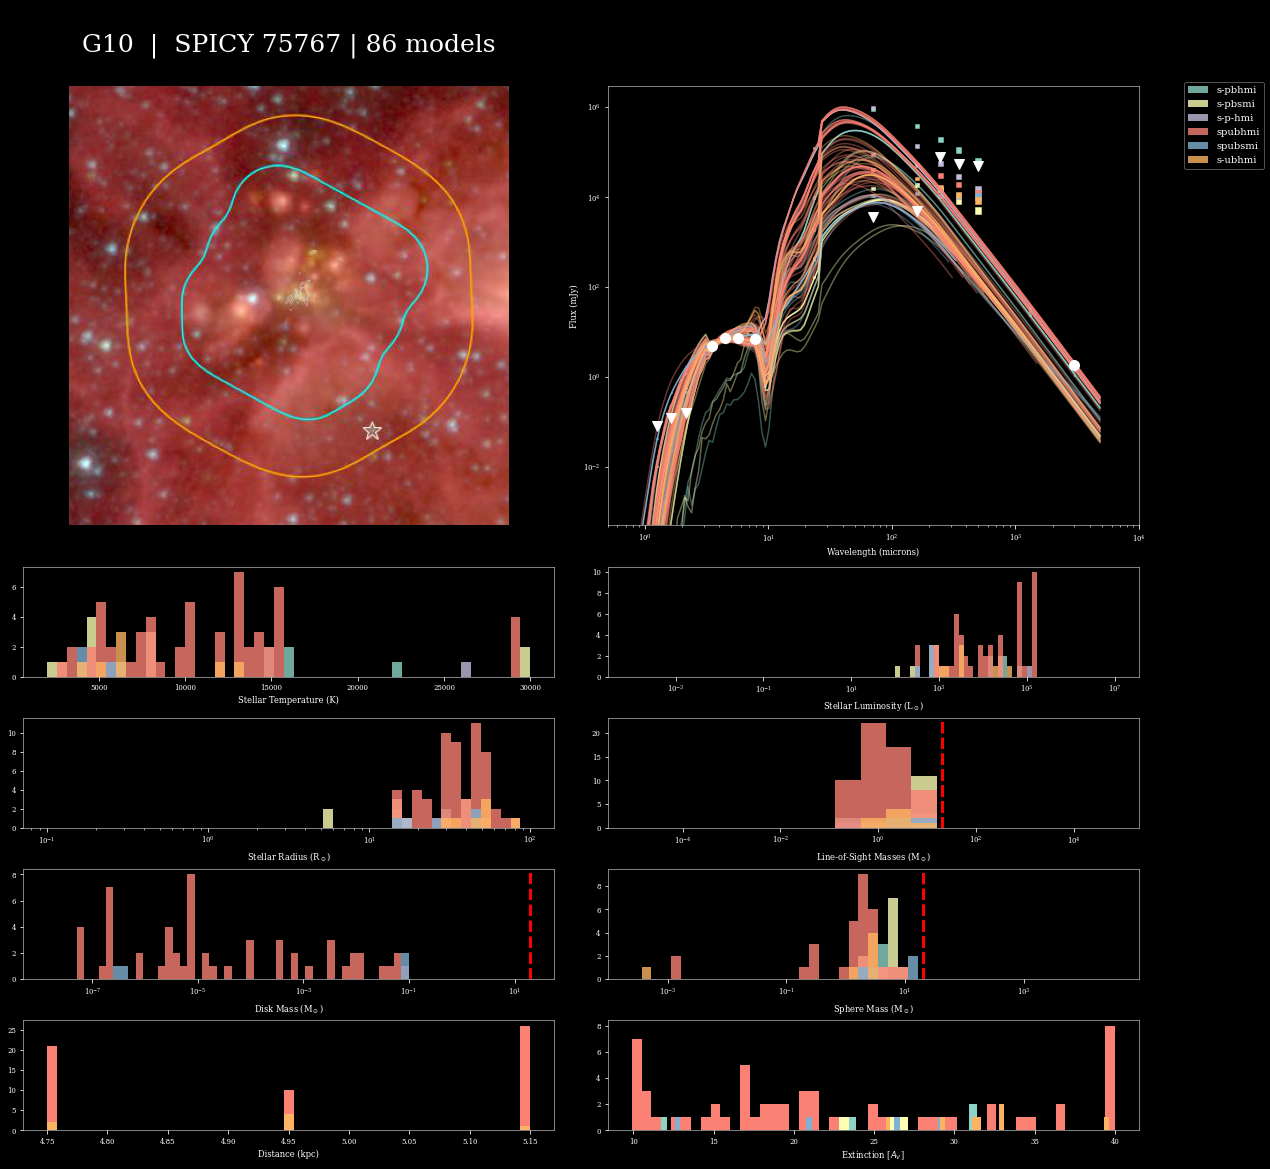

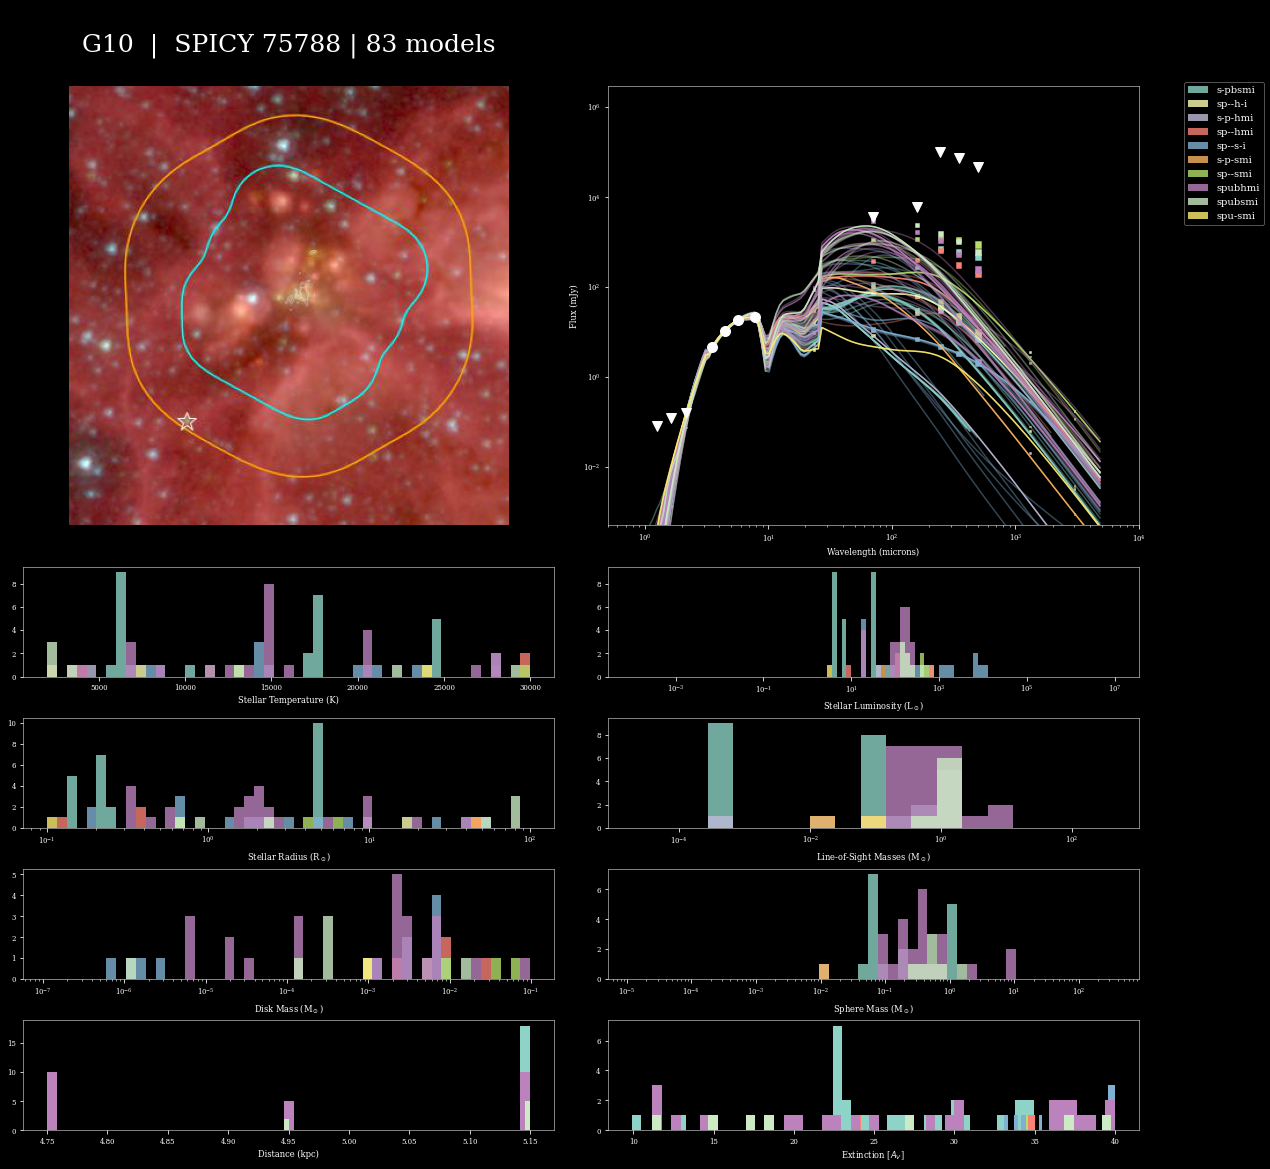

In [54]:
table_data_region = []
chi2minimums = []
chi2limits = []
okgeos = []
modelcounts = []

for spicyid in tqdm_notebook(sourceids):
    fits = full_source_fit(spicyid, av_range, distance_range, hemisphere)
    
    mass_ul = find_mass_ul(tbl, tbl.loc_indices[spicyid], regiondistance)/10**3
    
    chi2limit, chi2min = get_chi2limit()
    chi2limits.append(chi2limit)
    chi2minimums.append(chi2min)
    
    modelcount = get_modelcount(chi2limit)
    modelcounts.append(modelcount)
    
    okgeo = get_okgeo(show=False)
    okgeos.append(okgeo)
    
    figure = plot_fit(fits, okgeo, filepath, chi2limit=chi2limit, fieldid=fieldid, spicyid=spicyid, modelcount=modelcount, show_all_models=True, alpha_allmodels=None, mass_ul=mass_ul)
    
    figure.savefig(f'{filepath}/SED_plots/{fieldid}/{spicyid}.pdf', format="pdf", overwrite=True)
    figure.savefig(f'{filepath}/SED_plots/{fieldid}/{spicyid}.jpg', format="jpg", overwrite=True)
    
    all_data = []
    extinction_data, distance_data = [], []
    for geom in geometries:
        pars, data, selection = datafunction(geom, chi2limit, fits, min)
        all_data.append(data)
        distance_data.extend(10**fits[geom].sc[selection])
        extinction_data.extend(fits[geom].av[selection])
    data = table.vstack(all_data)
    
    table_data_source = {
        'means': {
            "star_temp": np.nanmean(np.log10(data['star.temperature'])),"model_lum": np.nanmean(np.log10(data['Model Luminosity'])),
            "star_rad": np.nanmean(np.log10(data['star.radius'])),"los_mass": np.nanmean(np.log10(data['Line-of-Sight Masses'][:,apnum])),
            "sphere_mass": np.nanmean(np.log10(data['Sphere Masses'][:,apnum])),"distance": np.nanmean(np.log10(distance_data)),
            "ext": np.nanmean(np.log10(extinction_data)),
            },
        'stds': {
            "star_temp": np.nanstd(np.log10(data['star.temperature'])),"model_lum": np.nanstd(np.log10(data['Model Luminosity'])),
            "star_rad": np.nanstd(np.log10(data['star.radius'])),"los_mass": np.nanstd(np.log10(data['Line-of-Sight Masses'][:,apnum])),
            "sphere_mass": np.nanstd(np.log10(data['Sphere Masses'][:,apnum])),"distance": np.nanstd(np.log10(distance_data)),
            "ext": np.nanstd(np.log10(extinction_data)),
            },
        'meds': {
            "star_temp": np.nanmedian(np.log10(data['star.temperature'])),"model_lum": np.nanmedian(np.log10(data['Model Luminosity'])),
            "star_rad": np.nanmedian(np.log10(data['star.radius'])),"los_mass": np.nanmedian(np.log10(data['Line-of-Sight Masses'][:,apnum])),
            "sphere_mass": np.nanmedian(np.log10(data['Sphere Masses'][:,apnum])),"distance": np.nanmedian(np.log10(distance_data)),
            "ext": np.nanmedian(np.log10(extinction_data)),
            },
        'mads': {
            "star_temp": mad_std(np.log10(data['star.temperature'])),"model_lum": mad_std(np.log10(data['Model Luminosity'])),
            "star_rad": mad_std(np.log10(data['star.radius'])),"los_mass": mad_std(np.log10(data['Line-of-Sight Masses'][:,apnum])),
            "sphere_mass": mad_std(np.log10(data['Sphere Masses'][:,apnum])),"distance": mad_std(np.log10(distance_data)),
            "ext": mad_std(np.log10(extinction_data)),
            },
        }
    
    table_data_region.append(table_data_source)

# Data

In [29]:
parameter_tables = []

PARAMETERS = ['star.temperature', 'Model Luminosity', 'star.radius', 'Line-of-Sight Masses', 'Sphere Masses', 'distance', 'extinction']
for y, x in enumerate(table_data_region):
    STD = [table_data_region[y]["stds"]["star_temp"], table_data_region[y]["stds"]["model_lum"], table_data_region[y]["stds"]["star_rad"], table_data_region[y]["stds"]["los_mass"], table_data_region[y]["stds"]["sphere_mass"], table_data_region[y]["stds"]["distance"], table_data_region[y]["stds"]["ext"]]
    MEAN = [table_data_region[y]["means"]["star_temp"], table_data_region[y]["means"]["model_lum"], table_data_region[y]["means"]["star_rad"], table_data_region[y]["means"]["los_mass"], table_data_region[y]["means"]["sphere_mass"], table_data_region[y]["means"]["distance"], table_data_region[y]["means"]["ext"]]
    Median = [table_data_region[y]["meds"]["star_temp"], table_data_region[y]["meds"]["model_lum"], table_data_region[y]["meds"]["star_rad"], table_data_region[y]["meds"]["los_mass"], table_data_region[y]["meds"]["sphere_mass"], table_data_region[y]["meds"]["distance"], table_data_region[y]["meds"]["ext"]]
    MAD = [table_data_region[y]["mads"]["star_temp"], table_data_region[y]["mads"]["model_lum"], table_data_region[y]["mads"]["star_rad"], table_data_region[y]["mads"]["los_mass"], table_data_region[y]["mads"]["sphere_mass"], table_data_region[y]["mads"]["distance"], table_data_region[y]["mads"]["ext"]]
    
    parameter_tables.append(Table([PARAMETERS, MEAN, STD, Median, MAD],
                            names=('Parameters', 'Mean', 'Standard Deviation','Median','Median Absolute Deviation')))
    

In [30]:
for parameter in ['Temperature','Luminosity','Radius','LOS mass','Sphere mass','Distance','Extinction']:
    for new_column_name in (f'{parameter} mean',
                            f'{parameter} standard deviation',
                            f'{parameter} Median',
                            f'{parameter} MAD'):
        if new_column_name not in tbl.colnames:
            tbl[new_column_name] = np.nan

if 'Included Geometries' not in tbl.colnames:
    tbl['Included Geometries'] = ",".join(geometries)
    
if 'Chi2 minimum' not in tbl.colnames:
    tbl['Chi2 minimum'] = np.nan

if 'Chi2 threshold' not in tbl.colnames:
    tbl['Chi2 threshold'] = np.nan

if 'NumberOfModels' not in tbl.colnames:
    tbl['NumberOfModels'] = 99999
    
for rownum, dataset in enumerate(table_data_region):
    tbl['Temperature mean'][rownum] = dataset["means"]["star_temp"]
    tbl['Temperature standard deviation'][rownum] = dataset["stds"]["star_temp"]
    tbl['Temperature Median'][rownum] = dataset["meds"]["star_temp"]
    tbl['Temperature MAD'][rownum] = dataset["mads"]["star_temp"]
    
    tbl['Luminosity mean'][rownum] = dataset["means"]["model_lum"]
    tbl['Luminosity standard deviation'][rownum] = dataset["stds"]["model_lum"]
    tbl['Luminosity Median'][rownum] = dataset["meds"]["model_lum"]
    tbl['Luminosity MAD'][rownum] = dataset["mads"]["model_lum"]
    
    tbl['Radius mean'][rownum] = dataset["means"]["star_rad"]
    tbl['Radius standard deviation'][rownum] = dataset["stds"]["star_rad"]
    tbl['Radius Median'][rownum] = dataset["meds"]["star_rad"]
    tbl['Radius MAD'][rownum] = dataset["mads"]["star_rad"]
    
    tbl['LOS mass mean'][rownum] = dataset["means"]["los_mass"]
    tbl['LOS mass standard deviation'][rownum] = dataset["stds"]["los_mass"]
    tbl['LOS mass Median'][rownum] = dataset["meds"]["los_mass"]
    tbl['LOS mass MAD'][rownum] = dataset["mads"]["los_mass"]
    
    tbl['Sphere mass mean'][rownum] = dataset["means"]["sphere_mass"]
    tbl['Sphere mass standard deviation'][rownum] = dataset["stds"]["sphere_mass"]
    tbl['Sphere mass Median'][rownum] = dataset["meds"]["sphere_mass"]
    tbl['Sphere mass MAD'][rownum] = dataset["mads"]["sphere_mass"]
    
    tbl['Distance mean'][rownum] = dataset["means"]["distance"]
    tbl['Distance standard deviation'][rownum] = dataset["stds"]["distance"]
    tbl['Distance Median'][rownum] = dataset["meds"]["distance"]
    tbl['Distance MAD'][rownum] = dataset["mads"]["distance"]
    
    tbl['Extinction mean'][rownum] = dataset["means"]["ext"]
    tbl['Extinction standard deviation'][rownum] = dataset["stds"]["ext"]
    tbl['Extinction Median'][rownum] = dataset["meds"]["ext"]
    tbl['Extinction MAD'][rownum] = dataset["mads"]["ext"]
    
for rownum, okgeo in enumerate(okgeos):
    tbl['Included Geometries'][rownum] = ",".join(okgeo)
    
for rownum, chi2min in enumerate(chi2minimums):
    tbl['Chi2 minimum'][rownum] = chi2min
    
for rownum, chi2limit in enumerate(chi2limits):
    tbl['Chi2 threshold'][rownum] = chi2limit

for rownum, modelcount in enumerate(modelcounts):
    tbl['NumberOfModels'][rownum] = modelcount

In [31]:
if not os.path.exists(f'{filepath}/Region_tables/Fitted'):
    os.makedirs(f'{filepath}/Region_tables/Fitted')

In [32]:
tbl

<Table length=3>
SPICY      ra        dec    ...   Chi2 threshold   NumberOfModels
          deg        deg    ...                                  
int64   float64    float64  ...      float64           int64     
------ ---------- --------- ... ------------------ --------------
102000 290.895932 14.507368 ... 11.391192083101027           3239
102002 290.897911 14.507966 ...                3.0           1348
102007 290.903307 14.521247 ... 13.957133672292318            108

In [33]:
tbl.write(f'{filepath}/Region_tables/Fitted/{fieldid}', format='fits', overwrite=True)

In [325]:
tbl = Table.read(f'{filepath}/Region_tables/Fitted/{fieldid}', format='fits')
tbl.add_index('SPICY')
tbl.sort('SPICY')

In [63]:
tbl

<Table length=2>
SPICY      ra        dec    ...   Chi2 threshold  NumberOfModels
          deg        deg    ...                                 
int64   float64    float64  ...      float64          int64     
------ ---------- --------- ... ----------------- --------------
102038  290.93318 14.508924 ... 672411690.2741323             37
102062 290.949473 14.500545 ... 8.131413542577342              2

## Parameter Histograms

In [29]:
def minmaxval(param,okgeo):
    minvals,maxvals = [],[]
    
    for geom in okgeo:
        pars_geom = Table.read(f'/blue/adamginsburg/richardson.t/research/flux/pars/{geom}_augmented.fits')
        if param in pars_geom.keys():
            if param in ('Line-of-Sight Masses','Sphere Masses'):
                data = pars_geom[param][:,apnum]
            else:
                data = pars_geom[param]
            minval,maxval = data[data>0].min(), np.nanmax(data)
            minvals.append(minval)
            maxvals.append(maxval)
    
    minval,maxval = np.nanmin(minvals), np.nanmax(maxvals)
    
    return minval,maxval

In [30]:
histparams = ['star.temperature','Model Luminosity',
              'star.radius','Line-of-Sight Masses',
              'disk.mass','Sphere Masses']
bounds = {}
for param in histparams:
    if param in pars.keys():
        minval,maxval = minmaxval(param,okgeo)
        bounds[param] = (minval, maxval)

In [31]:
def paramfig(fieldid,spicyid,fits,chi2limit,okgeo,modelcount):
    
    spicyid = tbl[rownum]['SPICY']
    fits = 
    
    basefig = plt.figure(figsize=(20, 10))
    gs = GridSpec(nrows=3, ncols=2, hspace=0.35, wspace=0.1)

    ax1 = basefig.add_subplot(gs[0, 0])
    ax2 = basefig.add_subplot(gs[0, 1])
    ax3 = basefig.add_subplot(gs[1, 0])
    ax4 = basefig.add_subplot(gs[1, 1])
    ax5 = basefig.add_subplot(gs[2, 0])
    ax6 = basefig.add_subplot(gs[2, 1])

    all_alpha = 0.05
    fit_alpha = 0.9

    for geom in okgeo:
        pars, data, selection = datafunction(geom, chi2limit, fits)
        if 'star.temperature' in pars.keys():
            bins = np.logspace(np.log10(bounds['star.temperature'][0]),np.log10(bounds['star.temperature'][1]))
            _,_,patches=ax1.hist(pars['star.temperature'], bins=bins, alpha=all_alpha, label=geom)
            ax1.hist(data['star.temperature'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
            
        if 'Model Luminosity' in pars.keys():
            bins = np.logspace(np.log10(bounds['Model Luminosity'][0]),np.log10(bounds['Model Luminosity'][1]))
            _,_,patches=ax2.hist(pars['Model Luminosity'], bins=bins, alpha=all_alpha, label=geom)
            ax2.hist(data['Model Luminosity'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
            
        if 'star.radius' in pars.keys():
            bins = np.logspace(np.log10(bounds['star.radius'][0]),np.log10(bounds['star.radius'][1]))
            _,_,patches=ax3.hist(pars['star.radius'], bins=bins, alpha=all_alpha, label=geom)
            ax3.hist(data['star.radius'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
            
        if 'Line-of-Sight Masses' in pars.keys():
            bins = np.logspace(np.log10(bounds['Line-of-Sight Masses'][0]),np.log10(bounds['Line-of-Sight Masses'][1]))
            _,_,patches=ax4.hist(pars['Line-of-Sight Masses'][:,apnum], bins=bins, alpha=all_alpha, label=geom)
            ax4.hist(data['Line-of-Sight Masses'][:,apnum], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
            
        if 'disk.mass' in pars.keys():
            bins = np.logspace(np.log10(bounds['disk.mass'][0]),np.log10(bounds['disk.mass'][1]))
            _,_,patches=ax5.hist(pars['disk.mass'], bins=bins, alpha=all_alpha, label=geom)
            ax5.hist(data['disk.mass'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
    
        if 'Sphere Masses' in pars.keys():
            bins = np.logspace(np.log10(bounds['Sphere Masses'][0]),np.log10(bounds['Sphere Masses'][1]))
            _,_,patches=ax6.hist(pars['Sphere Masses'][:,apnum], bins=bins, alpha=all_alpha, label=geom)
            ax6.hist(data['Sphere Masses'][:,apnum], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())

    ax1.loglog()
    ax2.loglog()
    ax3.loglog()
    ax4.loglog()
    ax5.loglog()
    ax6.loglog()

    handles, labels = ax1.get_legend_handles_labels()

    legend = ax2.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.16,1.08))
    for lh in legend.legendHandles:
        lh.set_alpha(fit_alpha)

    ax1.set_xlabel("Stellar Temperature (K)")
    ax2.set_xlabel("Stellar Luminosity (L$_\odot$)")
    ax3.set_xlabel("Stellar Radius (R$_\odot$)")
    ax4.set_xlabel("Line-of-Sight Masses* (M$_\odot$)")
    ax5.set_xlabel("Disk Mass (M$_\odot$)")
    ax6.set_xlabel("Sphere Mass* (M$_\odot$)")

    # $^1$ for superscript

    ttl = ax1.set_title(f'\n{fieldid}  |  SPICY {spicyid} | {modelcount} models\n', fontsize=25)

    #ax6.text(0.0, 0.0, f'Line-of-sight mass and Sphere mass assume aperture size of {sedcube.apertures[9].round(0)}', ha="center", fontsize=18)

    footnote = ax6.set_title(f'* Mass parameters assume aperture size of {sedcube.apertures[9].round(0)}\n', fontsize=13)
    footnote.set_position([0.5, -0.6])

SyntaxError: invalid syntax (<ipython-input-31-580f11cb0372>, line 4)